In [1]:
#import libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import random as rd

from scipy import linalg
from scipy.special import xlogy
from scipy.spatial.distance import cdist, pdist, squareform
from sklearn.metrics import mean_squared_error


### RBF Implementation from scratch

In [2]:
def get_distance(x, xk):

    return np.sqrt((x.reshape(-1,1)-xk.reshape(1,-1))**2)

def gauss_rbf(radius):
    return np.exp(-(radius)**2)


class RBF:
        
    def fit(self,xk, yk):

        self.xk = xk
        self.yk = yk
        
        distance = get_distance(xk, xk)

        # print(distance)
      
        transformation = gauss_rbf(distance)
        # print(transformation)
        self.w_ = np.linalg.solve(transformation, yk)

        # print(self.w_)

   

    def predict(self,xn):
        distance = get_distance(xn, xn)
        transformation = gauss_rbf(distance)
        # print(self.w_)
        return transformation.dot(self.w_[0:len(xn)])


In [3]:
data = pd.read_csv('PPC_Bag_DailySales.csv')

columns = ['Date','Quantity In Quintal']
opc_bulk_grouped_dataset = pd.DataFrame(data.values,columns=columns)



Train and predict using RBF

In [4]:
# store the labels into a variable y
y_opc_bulk = opc_bulk_grouped_dataset['Quantity In Quintal']


# store the data in X
X_opc_bulk = opc_bulk_grouped_dataset['Date']



# change to array
X_opc_bulk = np.array(X_opc_bulk)


y_opc_bulk = np.array(y_opc_bulk)


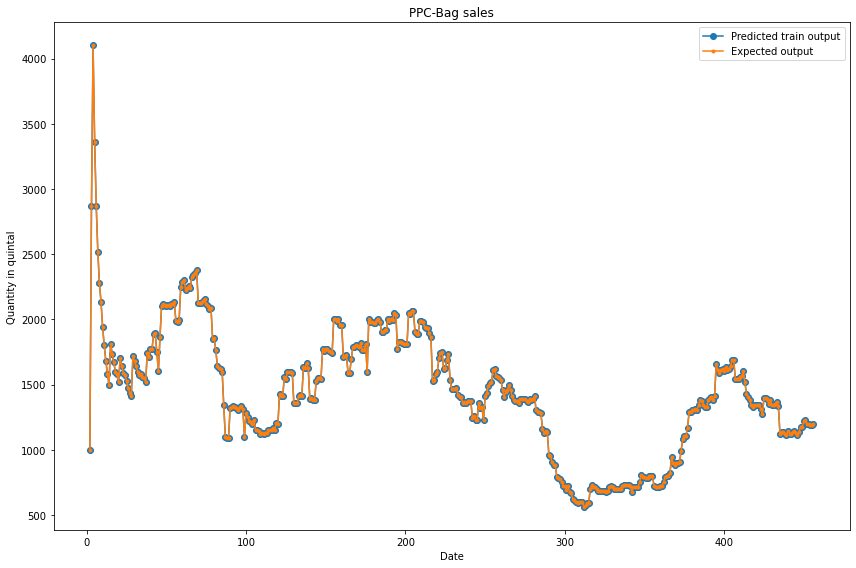

In [5]:
interp =RBF()
interp.fit(X_opc_bulk, y_opc_bulk)
y_pred_opc_bulk = interp.predict(X_opc_bulk)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(X_opc_bulk, y_pred_opc_bulk, '-o', label='Predicted train output')
plt.plot(X_opc_bulk, y_opc_bulk, '-o', markersize=3, label='Expected output')


plt.xlabel('Date')
plt.ylabel('Quantity in quintal')
plt.title('PPC-Bag sales')
plt.legend()
plt.tight_layout()
plt.show()

### Calculate root mean squared error

In [6]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_opc_bulk, y_pred_opc_bulk))
print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.00 RMSE
